## Spaceship Titanic Dataset with Sci-kit learn Random Forest Classifier

This notebook builds a Random Forest Classifier using Sci-kit Learn

### 1. Problem

Predicting which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

### 2. Data

The data I'm using is from the Kaggle's Spaceship Titanic Competition
https://www.kaggle.com/competitions/spaceship-titanic/data

### 3. Evaluation

The evaluation is based on the classification accuracy, the percentage of predicted labels that are correct.
https://www.kaggle.com/competitions/spaceship-titanic/overview/evaluation

### 4. Features

Some information about the data:
* This a structured data(csv files), so Supervised learning is employed.
* There are around 8000+ records with 14 columns in the training set(this has the target column)
* There are around 4000+ records with 13 columns in the test set(this does not have the target column)

Import the libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

Import the dataset

In [47]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("Full train dataset shape is {}".format(train.shape))
print("Full train dataset shape is {}".format(test.shape))

Full train dataset shape is (8693, 14)
Full train dataset shape is (4277, 13)


In [48]:
# Display the first 5 rows of the dataset
print(train.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


### Exploration of the dataset

In [49]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [50]:
print(train.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


True     4378
False    4315
Name: Transported, dtype: int64


<AxesSubplot:>

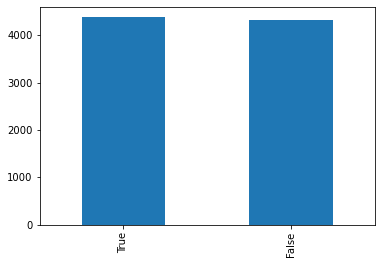

In [51]:
# Bar chart of the passengers who were transported
print(train["Transported"].value_counts())
train["Transported"].value_counts().plot.bar()

Let's visualize the numerical columns and their value counts

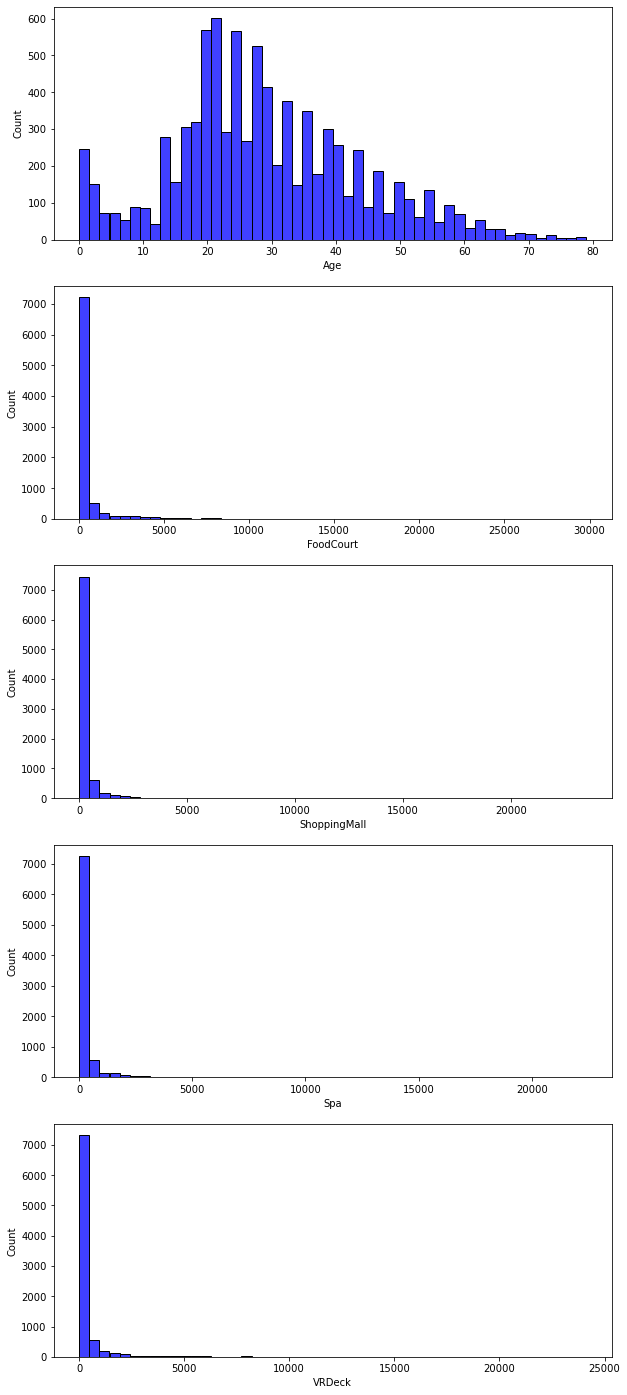

In [52]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(train['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(train['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(train['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(train['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(train['VRDeck'], color='b', bins=50, ax=ax[4]);

In [53]:
print(train.isna().sum().sort_values())

PassengerId       0
Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64


In [54]:
print(train["HomePlanet"].value_counts(dropna=False))
print(train["Destination"].value_counts(dropna=False))

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64


### Preparing the dataset

From the exploration of the dataset, there are missing data and a mix of numeric and categorical data. Preprocessing will be done on the categorical features.
The dataset also has boolean fields with missing data, so these are going to be converted to int and the missing values will be replace with zero.

In [55]:
# Dropping PassengerId and Name because they are not needed for the model training
train = train.drop(["PassengerId", "Name"], axis=1)

In [56]:
# Changing the object fields HomePlanet and Destination to categories
train["HomePlanet"] = train["HomePlanet"].astype("category")
train["Destination"] = train["Destination"].astype("category")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   category
 1   CryoSleep     8476 non-null   object  
 2   Cabin         8494 non-null   object  
 3   Destination   8511 non-null   category
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Transported   8693 non-null   bool    
dtypes: bool(1), category(2), float64(6), object(3)
memory usage: 637.1+ KB


In [57]:
# Filling the missing values of all numerical columns with 0
train[["CryoSleep", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = train[["CryoSleep", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(value=0)
train.isna().sum().sort_values()

CryoSleep         0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Destination     182
Cabin           199
HomePlanet      201
dtype: int64

In [58]:
# Converting the boolean fields Transported, CryoSleep and VIP to int
train["Transported"] = train["Transported"].astype("int")
train["CryoSleep"] = train["CryoSleep"].astype("int")
train["VIP"] = train["VIP"].astype("int")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   category
 1   CryoSleep     8693 non-null   int32   
 2   Cabin         8494 non-null   object  
 3   Destination   8511 non-null   category
 4   Age           8693 non-null   float64 
 5   VIP           8693 non-null   int32   
 6   RoomService   8693 non-null   float64 
 7   FoodCourt     8693 non-null   float64 
 8   ShoppingMall  8693 non-null   float64 
 9   Spa           8693 non-null   float64 
 10  VRDeck        8693 non-null   float64 
 11  Transported   8693 non-null   int32   
dtypes: category(2), float64(6), int32(3), object(1)
memory usage: 594.6+ KB


The value of Cabin is a string with the format of deck/num/side. Hence Cabin will be split into 3 new columns Deck, Cabin Num and Side.

In [59]:
train[["Deck", "Cabin_num", "Side"]] = train["Cabin"].str.split("/", expand=True)

In [60]:
col = ["HomePlanet", "Destination", "Deck", "Side"]
for col in col:
    train[col] = train[col].fillna(train[col].mode().iloc[0])
train["Cabin_num"] = train["Cabin_num"].astype("float")
train["Cabin_num"] = train["Cabin_num"].fillna(train["Cabin_num"].mean())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8693 non-null   category
 1   CryoSleep     8693 non-null   int32   
 2   Cabin         8494 non-null   object  
 3   Destination   8693 non-null   category
 4   Age           8693 non-null   float64 
 5   VIP           8693 non-null   int32   
 6   RoomService   8693 non-null   float64 
 7   FoodCourt     8693 non-null   float64 
 8   ShoppingMall  8693 non-null   float64 
 9   Spa           8693 non-null   float64 
 10  VRDeck        8693 non-null   float64 
 11  Transported   8693 non-null   int32   
 12  Deck          8693 non-null   object  
 13  Cabin_num     8693 non-null   float64 
 14  Side          8693 non-null   object  
dtypes: category(2), float64(7), int32(3), object(3)
memory usage: 798.4+ KB


In [61]:
train_dummies = pd.get_dummies(train, columns=["HomePlanet", "CryoSleep","Destination","VIP","Deck","Side"])
train_dummies.shape

(8693, 29)

In [62]:
train_dummies = train_dummies.drop("Cabin", axis=1)

Preprocessing of the training set has been completed and a total of 28 columns have been created, but when building the model, the 
training and test set must have the same number of features, so I will write a function that preprocesses the test dataset and produces the samenumber of features.

In [63]:
def preprocess(df):
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].mean())
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    print(df.isna().sum())
    df = df.drop("Name", axis=1)
    """
    The following code is for splitting the Cabin column into Deck, Cabin_num and Side and dropping Cabin
    """
    df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
    df = df.drop("Cabin", axis=1)
    """
    The following code is for converting the boolean features to int
    """
    df["CryoSleep"] = df["CryoSleep"].astype("int")
    df["VIP"] = df["VIP"].astype("int")
    """
    The following code is for encoding the categorical features
    """
    df_dummies = pd.get_dummies(df, columns=["HomePlanet", "CryoSleep","Destination","VIP","Deck","Side"])
    return pd.DataFrame(df_dummies)
    
    

Building the model

In [79]:
X = train_dummies.drop("Transported", axis=1)
y = train_dummies["Transported"]
X.shape, y.shape

((8693, 27), (8693,))

In [83]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [86]:
model = RandomForestClassifier(n_estimators=250)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
print(model.score(X_test, y_test))

0.8108108108108109


In [104]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[740, 123],
       [206, 670]], dtype=int64)

In [91]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       863
           1       0.84      0.76      0.80       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

0.8108108108108109


Hyper parameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV, cross_val_score
parameters = {"n_estimators" : [250, 300, 400, 500], "max_depth" : [2,3,4], "max_features" : ["log2", "sqrt"]}
modell = RandomForestClassifier()
cv = GridSearchCV(modell, param_grid=parameters)
cv.fit(X_train, y_train)
print(cv.best_score_)
print(cv.best_params_)

0.7578381062224269
{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 400}


Loading the test dataset using the function I defined and then predicting on it

In [92]:
test_df = preprocess(test)
test_df

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0013_01,27.000000,0.0,0.0,0.0,0.0,0.0,3,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0018_01,19.000000,0.0,9.0,0.0,2823.0,0.0,4,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0019_01,31.000000,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0021_01,38.000000,0.0,6652.0,0.0,181.0,585.0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0023_01,20.000000,10.0,0.0,635.0,0.0,0.0,5,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,34.000000,0.0,0.0,0.0,0.0,0.0,1496,1,0,...,0,0,0,0,0,0,1,0,0,1
4273,9269_01,42.000000,0.0,847.0,17.0,10.0,144.0,160,1,0,...,0,0,0,0,0,0,1,0,1,0
4274,9271_01,28.658146,0.0,0.0,0.0,0.0,0.0,296,0,0,...,0,0,0,1,0,0,0,0,1,0
4275,9273_01,28.658146,0.0,2680.0,0.0,0.0,523.0,297,0,1,...,0,0,0,1,0,0,0,0,1,0


In [93]:
test_dff = test_df.drop("PassengerId", axis=1)

In [100]:
test_prediction = model.predict(test_dff)

In [101]:
test_prediction

array([1, 0, 1, ..., 1, 1, 0])

In [102]:
submission = pd.DataFrame({"PassengerId" : test_df["PassengerId"], "Transported" : test_prediction})

In [103]:
submission["Transported"].value_counts()

0    2300
1    1977
Name: Transported, dtype: int64

In [98]:
submission.to_csv("sample_submission.csv", index=False)